In [1]:
import pandas as pd

In [8]:
data=pd.read_csv('/content/tennis.csv')

In [9]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
from sklearn.preprocessing import LabelEncoder

In [6]:
outlook=LabelEncoder()
temp=LabelEncoder()
humidity=LabelEncoder()
windy=LabelEncoder()
play=LabelEncoder()

In [10]:
data['outlook']=outlook.fit_transform(data['outlook'])
data['temp']=temp.fit_transform(data['temp'])
data['humidity']=humidity.fit_transform(data['humidity'])
data['windy']=windy.fit_transform(data['windy'])
data['play']=play.fit_transform(data['play'])

In [11]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [12]:
feature_cols=['outlook','temp','humidity','windy']
X=data[feature_cols]
y=data.play

In [13]:
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [14]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifier=DecisionTreeClassifier(criterion='gini')

In [22]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
classifier.predict(X_test)

array([0, 1, 0])

In [24]:
X_test

,outlook,temp,humidity,windy
2,0,1,0,0
7,2,2,0,0
1,2,1,0,1


In [25]:
classifier.score(X_test,y_test)

0.3333333333333333

[Text(0.45454545454545453, 0.9, 'x[2] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.18181818181818182, 0.7, 'x[1] <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.5, 'x[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.18181818181818182, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.3, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.45454545454545453, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7272727272727273, 0.7, 'x[3] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.6363636363636364, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8181818181818182, 0.5, 'x[1] <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7272727272727273, 0.3, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 

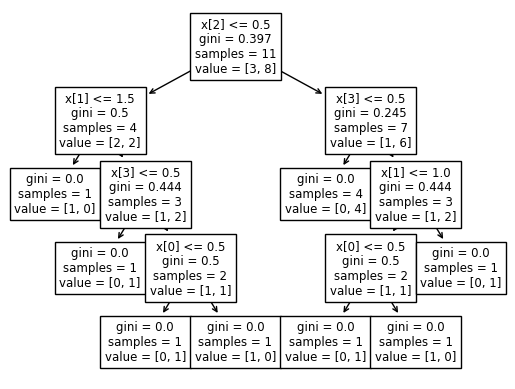

In [26]:
from sklearn import tree
tree.plot_tree(classifier)